# HIV Model

Becca Suchower

In [100]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

In [101]:
def make_system():
    """
    R = activated lymphocytes
    L = latently infected cells
    E = actively infected cells
    V = free virions
    """
    init = State(R=200, L=0, E=0, V=100)
    
    t0 = 0
    t_end = 120  
    
    'initializes rates'
    'Rate is Value/Day'

    'rate at which uninfected CD4 lymphocytes arise'
    gamma = 1.36 

    'HIV independent death rate of uninfected CD4 lymphocytes'
    mu = 0.00136 

    'proportion of cells activated'
    tau = 0.2 

    'rate of infection of CD4 lymphocytes per virion'
    beta = 0.00027   

    'proportion of cells becoming latently infected upon infection'
    rho = 0.1 

    'activation rate of latently infected cells'
    alpha = 0.036 

    'removal rate of cell free virus'
    sigma = 2 

    'removal (death) rate of actively infected CD4'
    delta = 0.33

    'rate of production of virions by an actively infected cell'
    pi = 100 

    dt = 0.1
    
    return System(init=init, t0=t0, t_end=t_end, gamma=gamma, mu=mu, tau=tau, beta=beta, 
                  rho=rho, alpha=alpha, sigma=sigma, delta=delta, pi=pi, dt=dt)

In [102]:
def update_func(state, dt, system):
    unpack(system)
    R, L, E, V = state
   
    dr = (gamma*tau - mu*R - beta*R*V) * dt
    dl = (rho*beta*R*V - mu*L - alpha*L) * dt
    de = ((1-rho)*beta*R*V + alpha*L - delta*E) * dt
    dv = (pi*E - sigma*V) *dt
    
    R += dr 
    L += dl
    E += de
    V += dv
    
    return State(R=R, L=L, E=E, V=V)

In [103]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
    
    return frame

In [104]:
system = make_system()
results = run_simulation(system, update_func)
results.head()

,R,L,E,V
0.0,200,0,0,100
0.1,199.46,0.054,0.486,80
0.2,199.029,0.0968816,0.857907,68.86
0.3,198.659,0.133524,1.16298,63.6671
0.4,198.318,0.167174,1.43243,62.5635


In [105]:
def plot_results(R, L, E):
    plot(R, '--', label='R')
    plot(L, '-', label='L')
    plot(E, ':', label='E')
    decorate(xlabel='Days from Infection',
             ylabel='Number of Each Cell'
            )

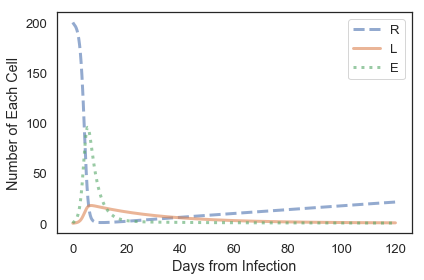

In [106]:
plot_results(results.R, results.L, results.E)

In [107]:
def plot_v(V):
    plot(V, '-', label='V')
    decorate(xlabel='Days from Infection',
             ylabel='Number of Virions'
            )

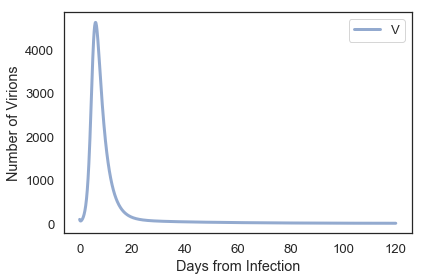

In [108]:
plot_v(results.V)